In [1]:
import os
import librosa
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

/Users/eneskaranfil/opt/anaconda3/envs/py36/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


Visually inspecting spectrograms doesn’t tell us much, but it does give us a hint that they are different for different genres of music. We’ll see in the next recipe whether a network can learn to distinguish between them too.

In [2]:
song_spec1 = []
id_to_genre1 = []
genre_to_id1 = []
genres1 = []

In [3]:
def load_songs(song_folder):
    song_specs = []
    idx_to_genre = []
    genre_to_idx = {}
    genres = []
    for genre in os.listdir(song_folder):
        genre_to_idx[genre] = len(genre_to_idx)
        idx_to_genre.append(genre)
        genre_folder = os.path.join(song_folder, genre)
        for song in os.listdir(genre_folder):
            if song.endswith('.au'):
                signal, sr = librosa.load(os.path.join(genre_folder, song))
                melspec = librosa.feature.melspectrogram(signal, sr=sr).T[:1280, ]
                song_specs.append(melspec)
                genres.append(genre_to_idx[genre])
    return song_specs, genres, genre_to_idx, idx_to_genre

In [4]:
song_spec1, genres1, genre_to_id1, id_to_genre1 = load_songs(song_folder="genres")
print("loaded songs")

loaded songs


In [7]:
def show_spectogram(show_genre):
    show_genre = genre_to_id1[show_genre]
    specs = []
    for spec, genre in zip(song_spec1, genres1):
        if show_genre == genre:
            specs.append(spec)
            if len(specs) == 25:
                break
    if not specs:
        return 'not found!'
    x = np.concatenate(specs, axis=1)
    x = (x - x.min()) / (x.max() - x.min())
    plt.imshow((x * 20).clip(0, 1.0))

Spectogram is coming
ENDS


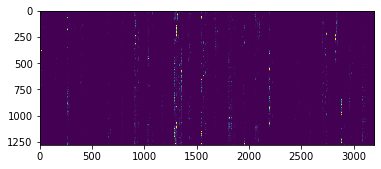

In [8]:
print("Spectogram is coming")
show_spectogram('classical')
print("ENDS")